In [90]:
pip install xgboost

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [92]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + ['radius1', 'texture1', 'perimeter1', 'area1',
                                 'smoothness1', 'compactness1', 'concavity1',
                                 'concave_points1', 'symmetry1', 'fractal_dimension1',
                                 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2',
                                 'compactness2', 'concavity2', 'concave_points2', 'symmetry2',
                                 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
                                 'area3', 'smoothness3', 'compactness3', 'concavity3',
                                 'concave_points3', 'symmetry3', 'fractal_dimension3']
data = pd.read_csv(url, header=None, names=columns)

# Show the first few rows
print(data.head())


         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

In [93]:
data.head(10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


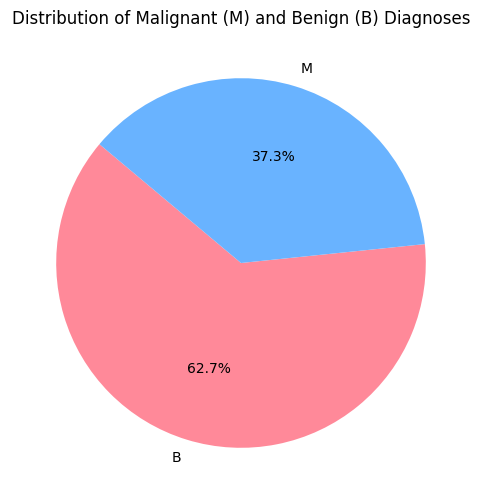

In [94]:
# Count the occurrences of 'M' and 'B' in the 'Diagnosis' column
diagnosis_counts = data['Diagnosis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF8999', '#69B3FF'])
plt.title("Distribution of Malignant (M) and Benign (B) Diagnoses")
plt.show()

In [95]:
# Replace 'age' with the desired column name
def outlier_test(column_name,data_frame):
    # Calculate the IQR (Interquartile Range)
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Identify outliers
    outliers = data_frame[(data[column_name] < lower_bound) | (data_frame[column_name] > upper_bound)]
 
    # Get the number of outliers
    num_outliers = len(outliers)
 
    # Display the number of outliers for the specified column
    print(f"Number of outliers for '{column_name}': {num_outliers}")

In [96]:
for i in data.select_dtypes(include=['float64', 'int64']).columns:
    outlier_test(i,data)

Number of outliers for 'ID': 81
Number of outliers for 'radius1': 14
Number of outliers for 'texture1': 7
Number of outliers for 'perimeter1': 13
Number of outliers for 'area1': 25
Number of outliers for 'smoothness1': 6
Number of outliers for 'compactness1': 16
Number of outliers for 'concavity1': 18
Number of outliers for 'concave_points1': 10
Number of outliers for 'symmetry1': 15
Number of outliers for 'fractal_dimension1': 15
Number of outliers for 'radius2': 38
Number of outliers for 'texture2': 20
Number of outliers for 'perimeter2': 38
Number of outliers for 'area2': 65
Number of outliers for 'smoothness2': 30
Number of outliers for 'compactness2': 28
Number of outliers for 'concavity2': 22
Number of outliers for 'concave_points2': 19
Number of outliers for 'symmetry2': 27
Number of outliers for 'fractal_dimension2': 28
Number of outliers for 'radius3': 17
Number of outliers for 'texture3': 5
Number of outliers for 'perimeter3': 15
Number of outliers for 'area3': 35
Number of o

In [97]:
def histplot_test(val):
    sns.histplot(data[val],bins=10,kde=True)
    plt.xlabel("value")
    plt.ylabel("Freequency")
    plt.title(f"histogram of {val}")
    plt.show()

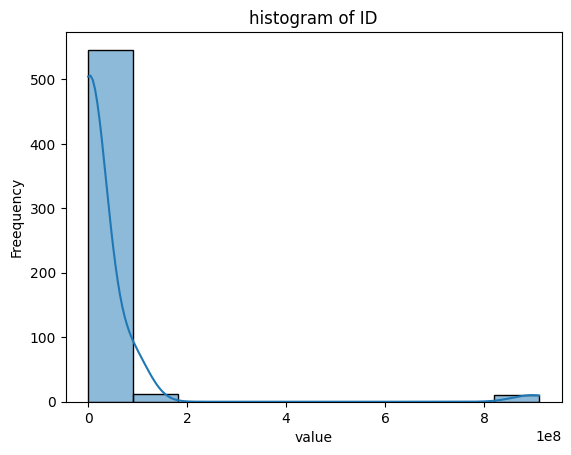

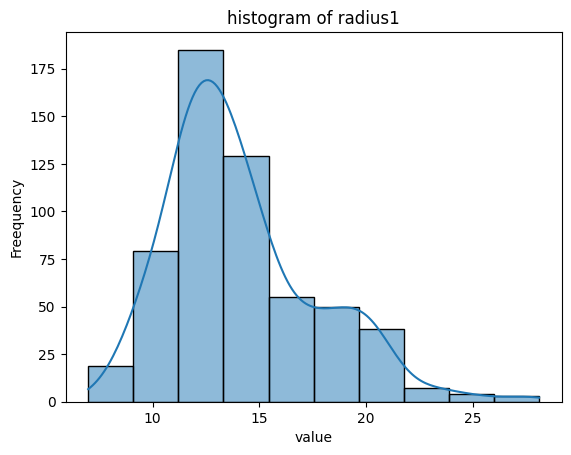

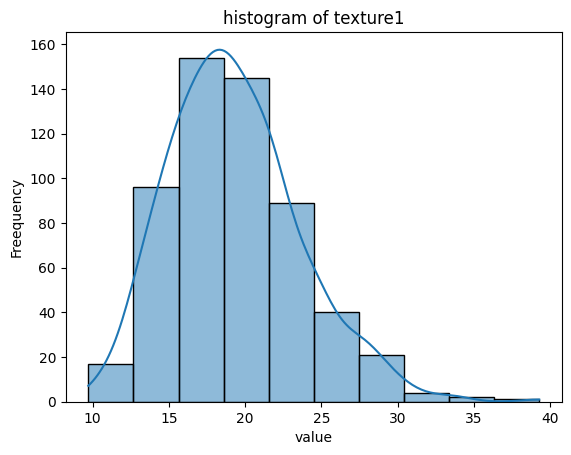

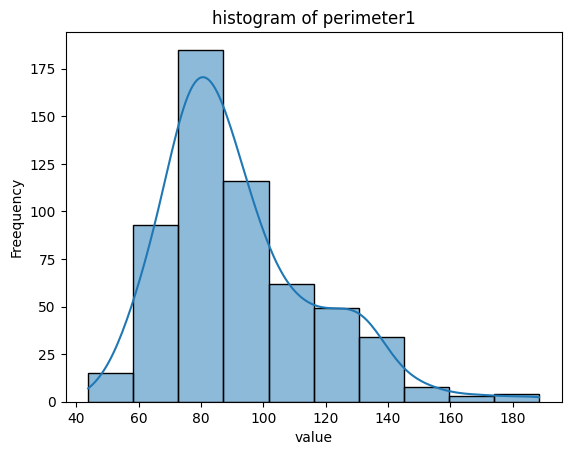

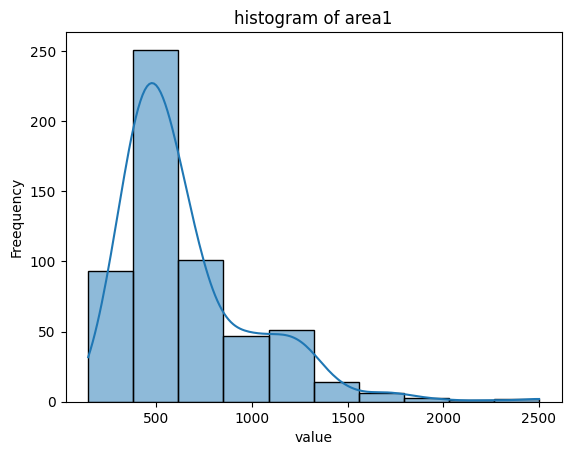

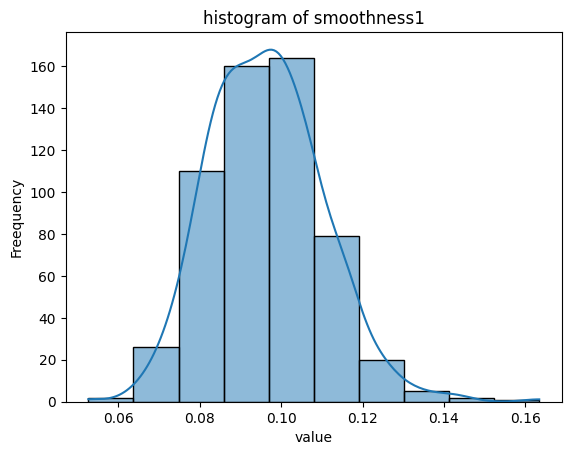

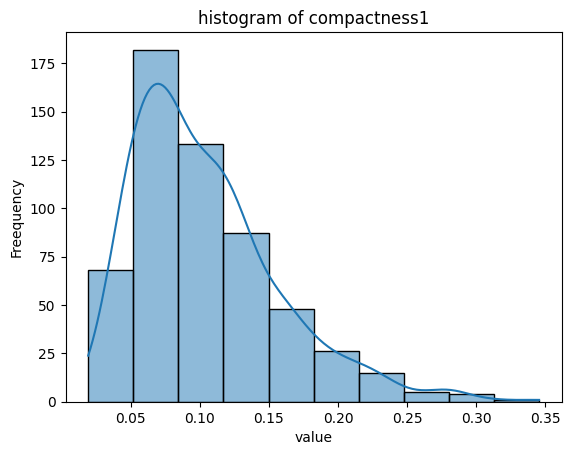

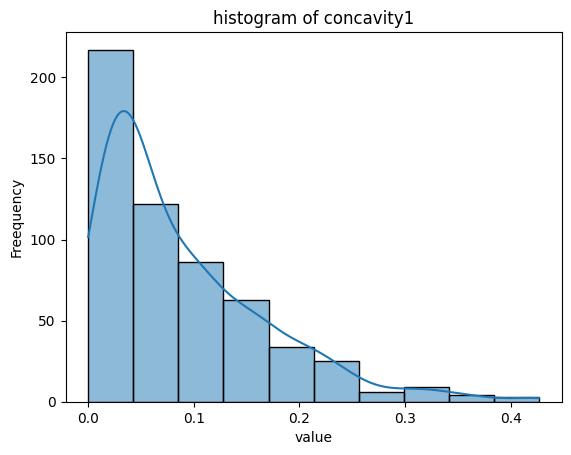

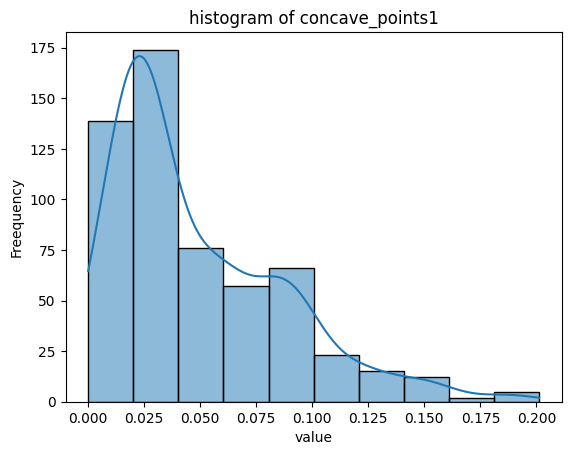

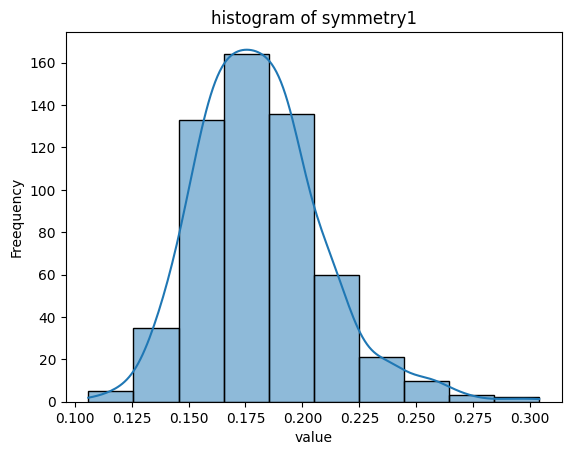

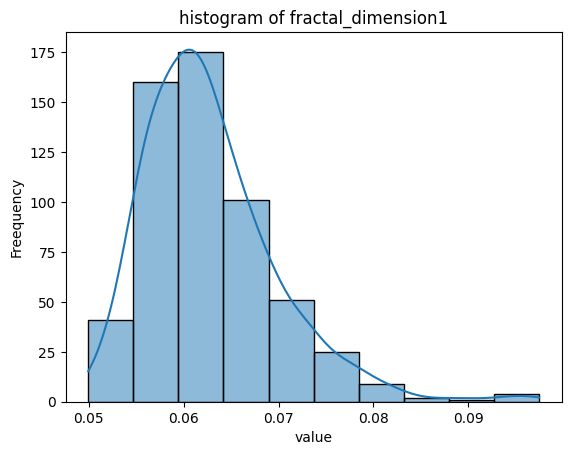

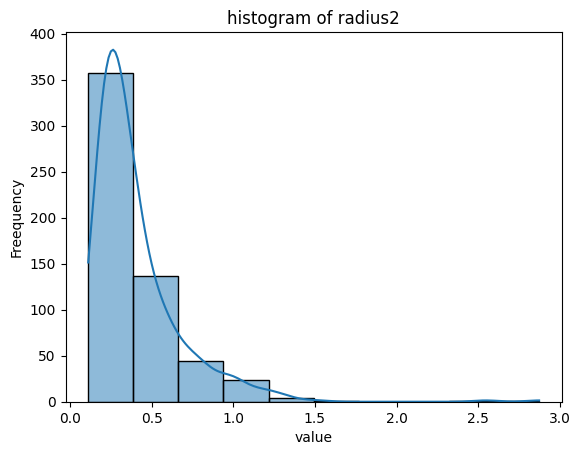

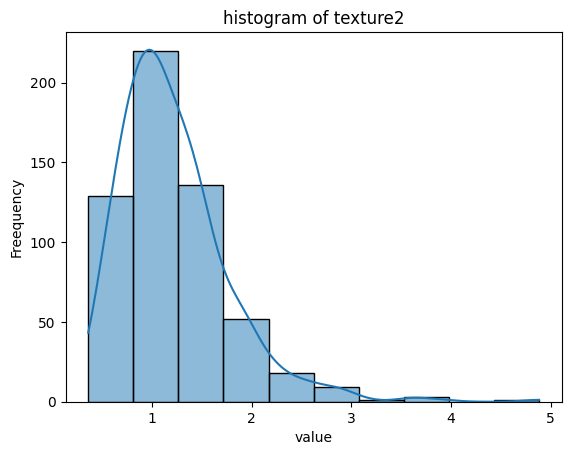

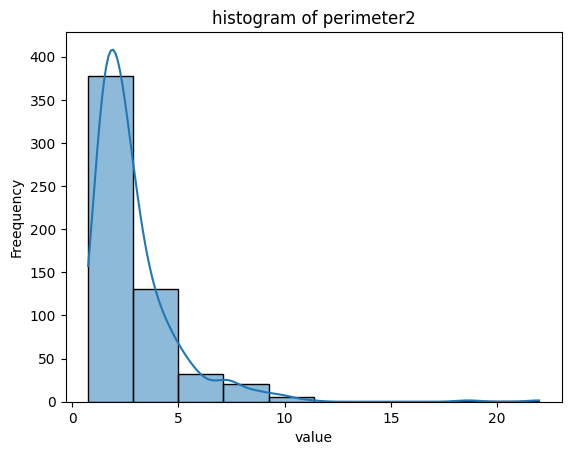

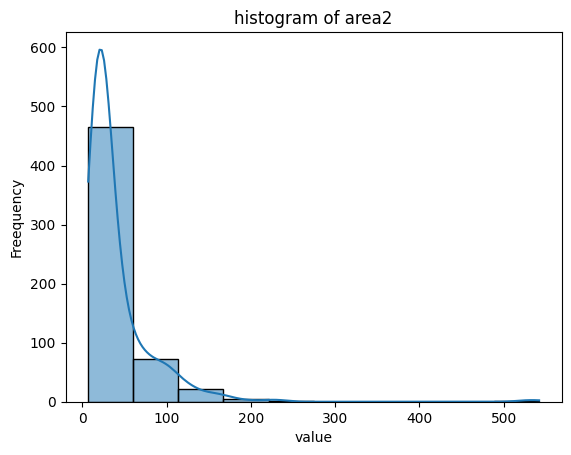

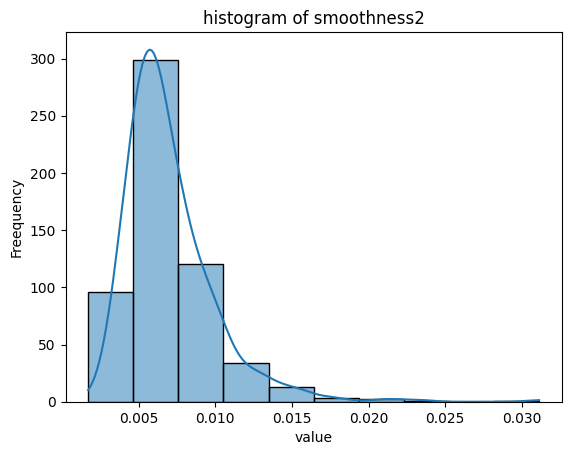

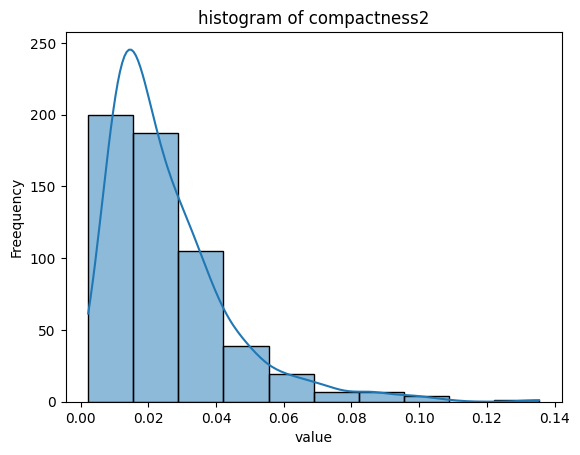

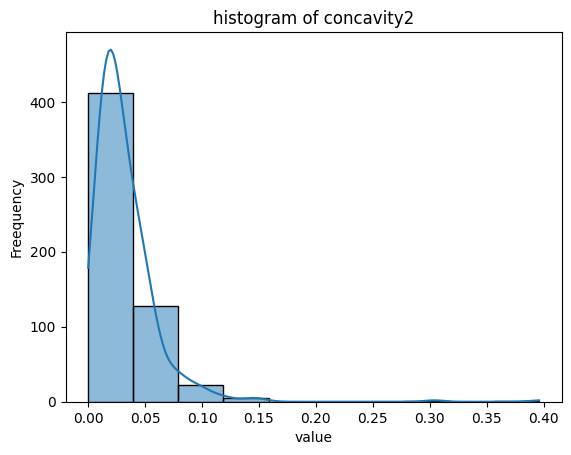

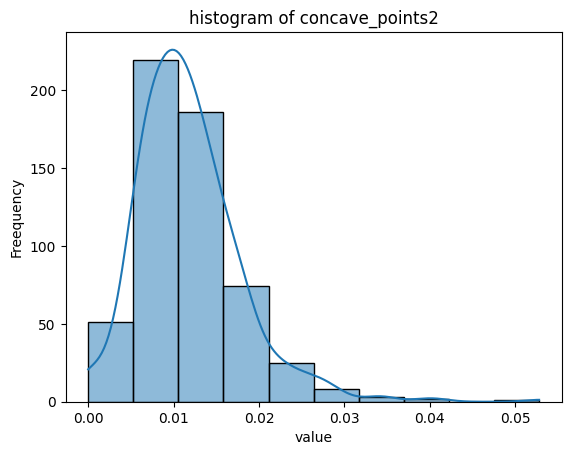

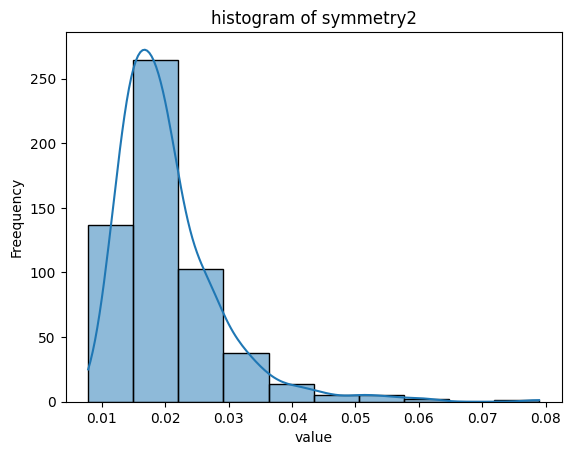

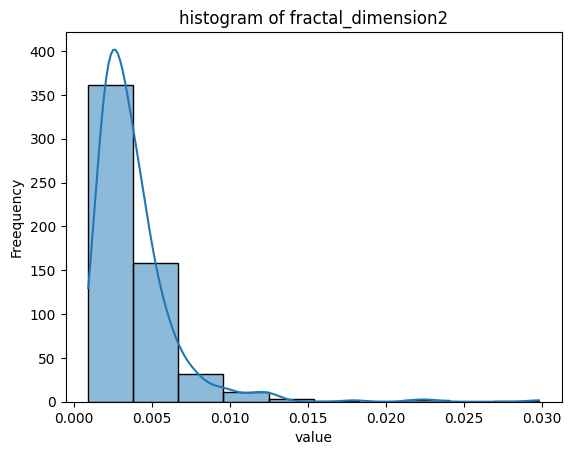

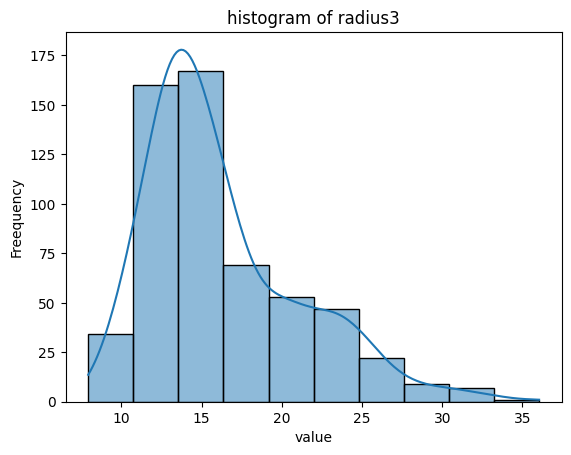

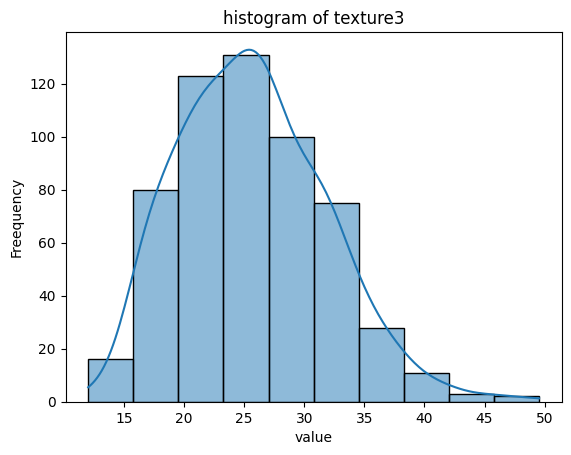

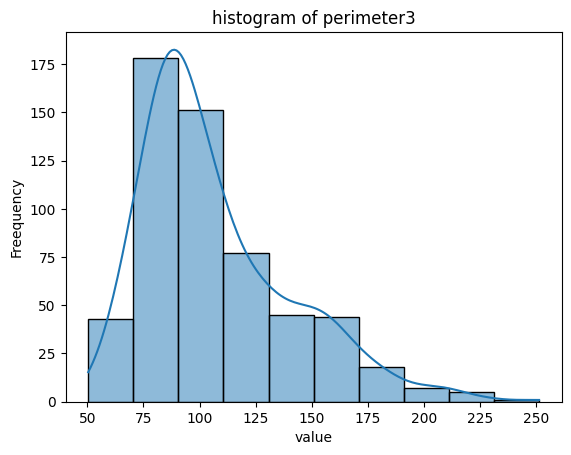

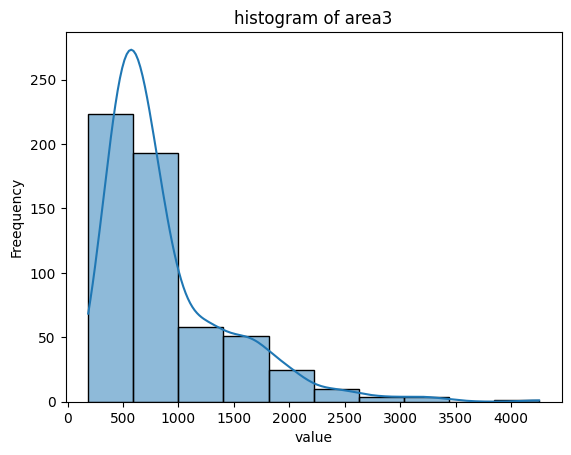

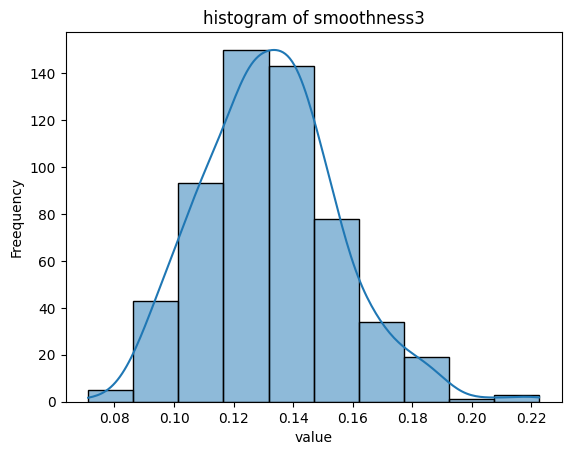

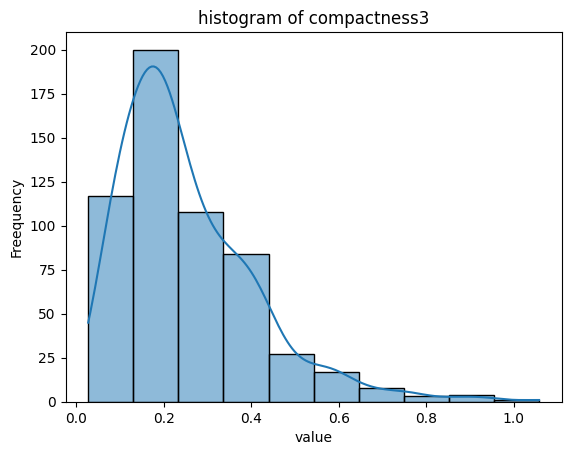

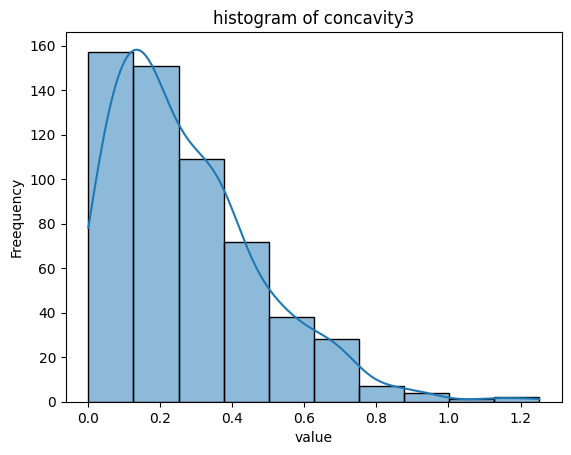

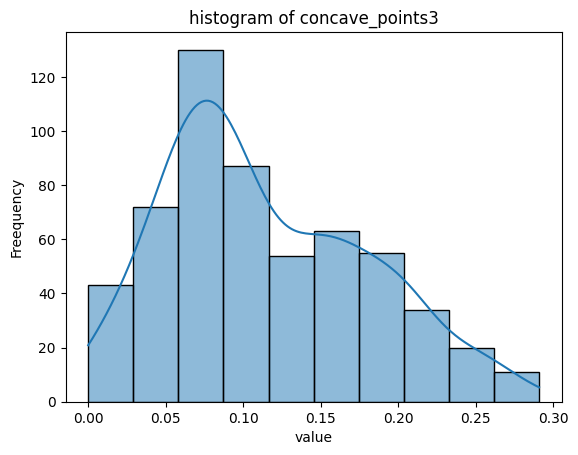

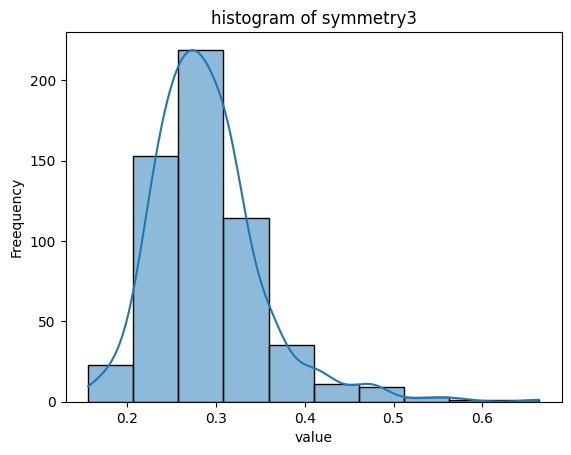

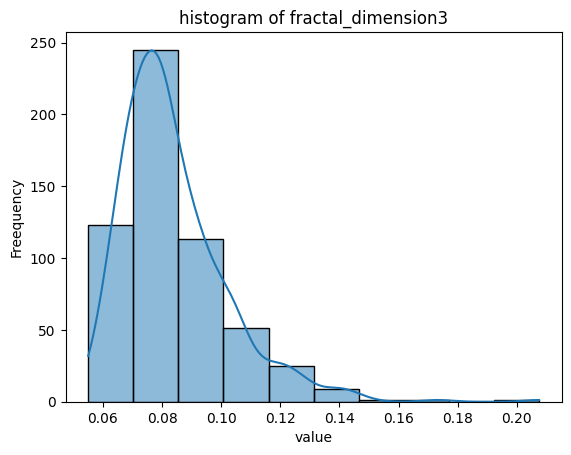

In [98]:
for i in data.select_dtypes(include=['float64','int64']):
    histplot_test(i)

In [99]:
data.duplicated().sum()

0

In [100]:
data.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [101]:
data.drop('ID', axis=1, inplace=True)

In [102]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [103]:
data['Diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

In [104]:
data_vif=data.copy()

In [105]:
data_vif.columns

Index(['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [106]:
data_vif_pass=data_vif.drop(['area1','radius1','area2','radius2','radius3','area3','concavity1','concavity2','concavity3','compactness1','compactness2','perimeter3','concave_points1','concave_points2','concave_points3','fractal_dimension3','fractal_dimension2','texture1','texture3','smoothness3'], axis=1).copy()

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example DataFrame (replace with your actual dataset)

# Add constant to the data (intercept term)
X = add_constant(data_vif_pass)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
print(vif_data)

               Feature         VIF
0                const  337.743550
1            Diagnosis    3.240835
2           perimeter1    5.290145
3          smoothness1    2.349636
4            symmetry1    2.995382
5   fractal_dimension1    3.821458
6             texture2    1.537587
7           perimeter2    3.104662
8          smoothness2    1.901272
9            symmetry2    2.597828
10        compactness3    3.927063
11           symmetry3    4.749527


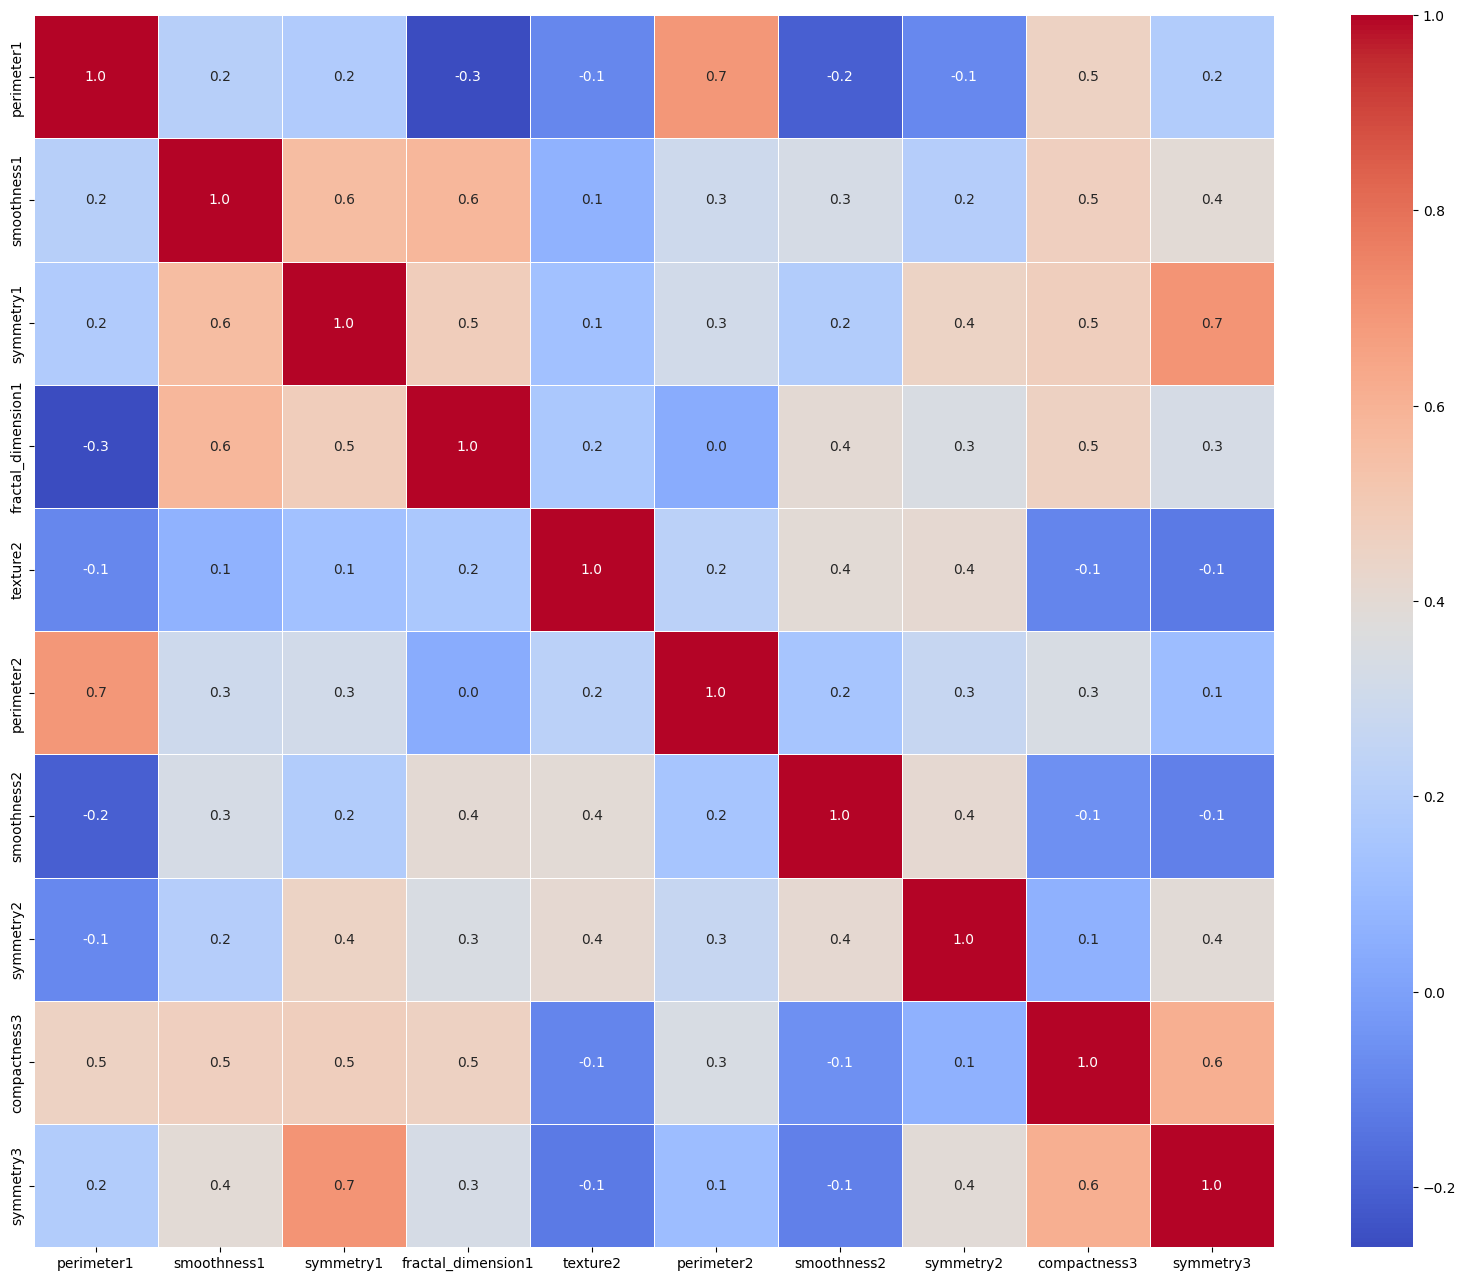

In [108]:
# Assuming 'data_vif_pass' is your DataFrame
plt.figure(figsize=(20, 16))

# Generate the heatmap for correlation matrix with annotations
sns.heatmap(data_vif_pass.drop('Diagnosis',axis=1).corr(), annot=True, cmap='coolwarm', fmt='.01f', linewidths=0.5)

# Show the plot
plt.show()

In [109]:
data_raw=data_vif_pass.copy()

In [110]:
data_raw

,Diagnosis,perimeter1,smoothness1,symmetry1,fractal_dimension1,texture2,perimeter2,smoothness2,symmetry2,compactness3,symmetry3
0,1,122.80,0.11840,0.2419,0.07871,0.9053,8.589,0.006399,0.03003,0.66560,0.4601
1,1,132.90,0.08474,0.1812,0.05667,0.7339,3.398,0.005225,0.01389,0.18660,0.2750
2,1,130.00,0.10960,0.2069,0.05999,0.7869,4.585,0.006150,0.02250,0.42450,0.3613
3,1,77.58,0.14250,0.2597,0.09744,1.1560,3.445,0.009110,0.05963,0.86630,0.6638
4,1,135.10,0.10030,0.1809,0.05883,0.7813,5.438,0.011490,0.01756,0.20500,0.2364
...,...,...,...,...,...,...,...,...,...,...,...
564,1,142.00,0.11100,0.1726,0.05623,1.2560,7.673,0.010300,0.01114,0.21130,0.2060
565,1,131.20,0.09780,0.1752,0.05533,2.4630,5.203,0.005769,0.01898,0.19220,0.2572
566,1,108.30,0.08455,0.1590,0.05648,1.0750,3.425,0.005903,0.01318,0.30940,0.2218
567,1,140.10,0.11780,0.2397,0.07016,1.5950,5.772,0.006522,0.02324,0.86810,0.4087


In [111]:
data_raw_final=data_raw.copy()
data_smoothed=data_raw.copy()
data_smote=data_raw.copy()

In [112]:
def outlier_smooth(column_name,data_frame):
    # Calculate the IQR (Interquartile Range)
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Calculate the median of the column
    median_value = data_frame[column_name].median()
 
    # Identify outliers
    outliers = (data_frame[column_name] < lower_bound) | (data_frame[column_name] > upper_bound)
    data_frame.loc[outliers, column_name] = median_value

    # Print if any changes were made
    if outliers.any():
        print(f"{column_name} changed")
    # Get the number of outliers
    #num_outliers = len(outliers)
 
    # Display the number of outliers for the specified column
    #print(f"Number of outliers for '{column_name}': {num_outliers}")

In [113]:
for i in data_smoothed.drop('Diagnosis',axis = 1).columns:
    outlier_smooth(i,data_smoothed)

perimeter1 changed
smoothness1 changed
symmetry1 changed
fractal_dimension1 changed
texture2 changed
perimeter2 changed
smoothness2 changed
symmetry2 changed
compactness3 changed
symmetry3 changed


In [114]:
data_smoothed.describe().T

,count,mean,std,min,25%,50%,75%,max
Diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.00000,1.000000,1.00000
perimeter1,569.0,90.144288,21.405756,43.790000,75.170000,86.24000,102.400000,147.30000
smoothness1,569.0,0.096000,0.013126,0.062510,0.086410,0.09587,0.104900,0.13350
symmetry1,569.0,0.179200,0.023715,0.116700,0.162000,0.17920,0.194300,0.24590
fractal_dimension1,569.0,0.062151,0.005842,0.049960,0.057700,0.06154,0.065690,0.07871
texture2,569.0,1.151444,0.424286,0.360200,0.833900,1.10800,1.410000,2.42600
perimeter2,569.0,2.452209,1.094063,0.757000,1.606000,2.28700,2.974000,5.86500
smoothness2,569.0,0.006547,0.001994,0.001713,0.005169,0.00638,0.007702,0.01243
symmetry2,569.0,0.019229,0.005529,0.007882,0.015160,0.01873,0.022030,0.03546
compactness3,569.0,0.238212,0.127693,0.027290,0.147200,0.21190,0.315000,0.62470


In [115]:
for i in data_smoothed.drop('Diagnosis',axis = 1).columns:
    outlier_test(i,data_smoothed)

Number of outliers for 'perimeter1': 4
Number of outliers for 'smoothness1': 2
Number of outliers for 'symmetry1': 2
Number of outliers for 'fractal_dimension1': 7
Number of outliers for 'texture2': 5
Number of outliers for 'perimeter2': 21
Number of outliers for 'smoothness2': 9
Number of outliers for 'symmetry2': 14
Number of outliers for 'compactness3': 12
Number of outliers for 'symmetry3': 11


In [116]:
X_smote = data_smote.drop('Diagnosis', axis=1)  # All columns except Diagnosis
y_smote = data_smote['Diagnosis']
smote=SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_smote, y_smote)
data_after_smote=pd.concat([X_train_smote, y_train_smote], axis=1)

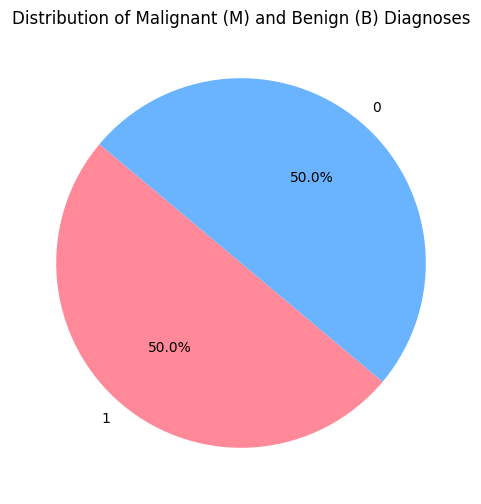

In [117]:
# Count the occurrences of 'M' and 'B' in the 'Diagnosis' column
diagnosis_counts = data_after_smote['Diagnosis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF8999', '#69B3FF'])
plt.title("Distribution of Malignant (M) and Benign (B) Diagnoses")
plt.show()

In [118]:
data_smt=data_after_smote.copy()
data_smt_smooth=data_after_smote.copy()

In [119]:
for i in data_smt_smooth.drop('Diagnosis',axis = 1).columns:
    outlier_smooth(i,data_smt_smooth)

perimeter1 changed
smoothness1 changed
symmetry1 changed
fractal_dimension1 changed
texture2 changed
perimeter2 changed
smoothness2 changed
symmetry2 changed
compactness3 changed
symmetry3 changed


In [120]:
models=[]
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('XGboost', xgb.XGBClassifier()))
def model_build(data_inp):
    # Define features and target variable
    X = data_inp.drop('Diagnosis', axis=1)  # All columns except Diagnosis
    y = data_inp['Diagnosis']
    # Split the data into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print(f'Training data shape: {X_train.shape}')
    print(f'Testing data shape: {X_test.shape}')
    for name,model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        print(f'The classification by {name} model is as follows')
        print(classification_report(y_test,y_pred))
        fpr,tpr,threshold=roc_curve(y_test,y_pred)
        auc = roc_auc_score(y_test, y_pred)
        plt.plot([0,1],[0,1],'k--',label='Random Choice', color='Red')
        plt.plot(fpr,tpr, label=f'ROC Curve for {name} model', color='blue')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.text(.5,.2,f'AUC for the {name} model is {auc:.2f}')
        plt.title(f'ROC Curve for {name} model')
        plt.legend()
        plt.show()
        
        
    

Training data shape: (398, 10)
Testing data shape: (171, 10)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



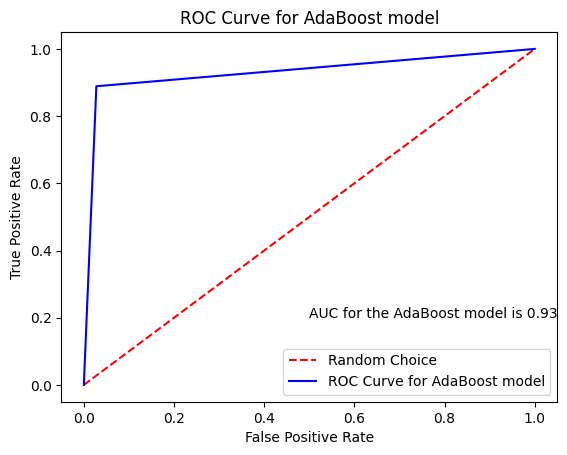

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       108
           1       0.96      0.87      0.92        63

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



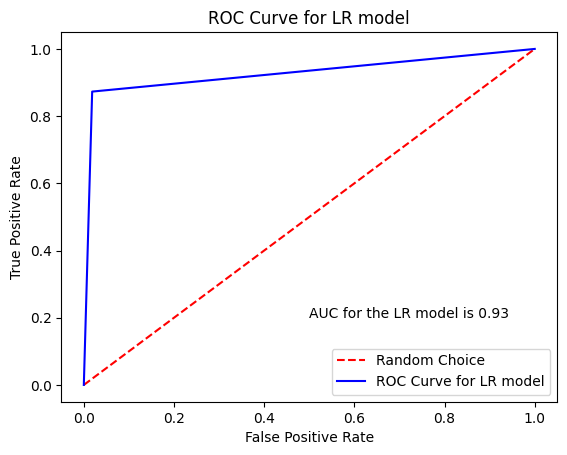

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       108
           1       0.87      0.92      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



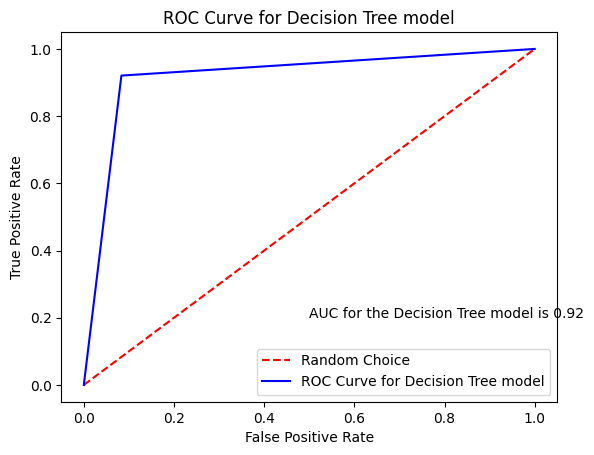

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



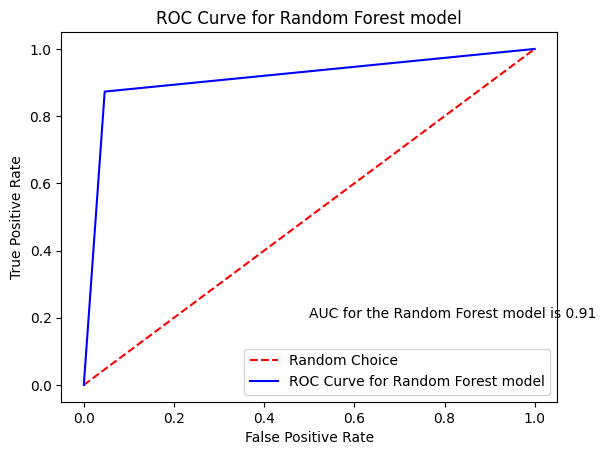

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       108
           1       0.92      0.86      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



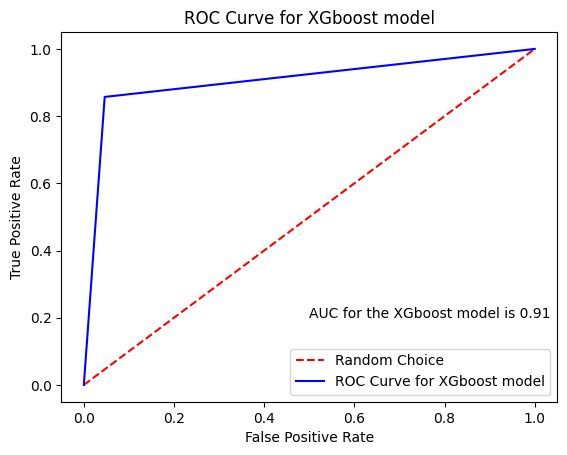

In [121]:
model_build(data_raw_final)

Training data shape: (398, 10)
Testing data shape: (171, 10)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       108
           1       0.95      0.84      0.89        63

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



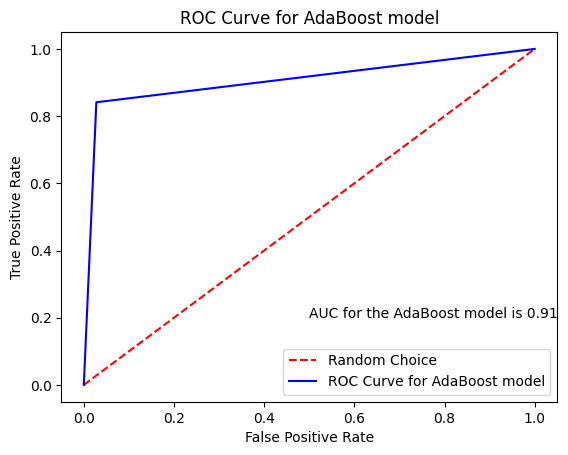

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       108
           1       0.95      0.84      0.89        63

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



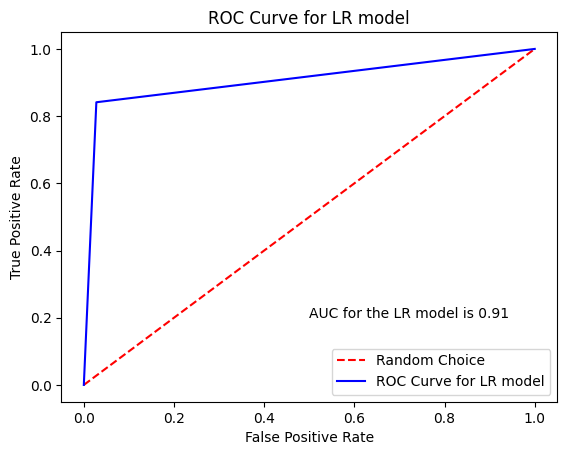

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       108
           1       0.89      0.81      0.85        63

    accuracy                           0.89       171
   macro avg       0.89      0.88      0.88       171
weighted avg       0.89      0.89      0.89       171



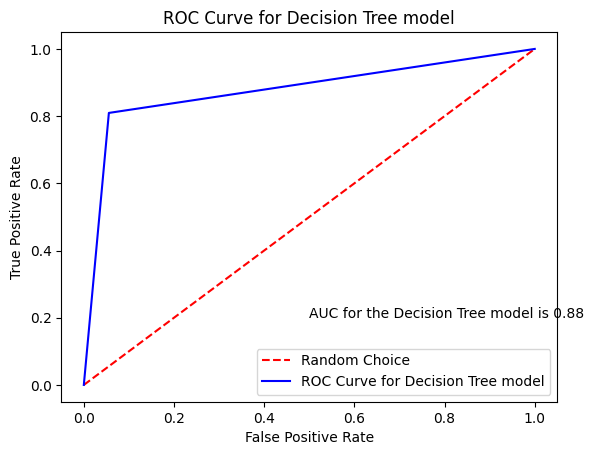

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       108
           1       0.92      0.89      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



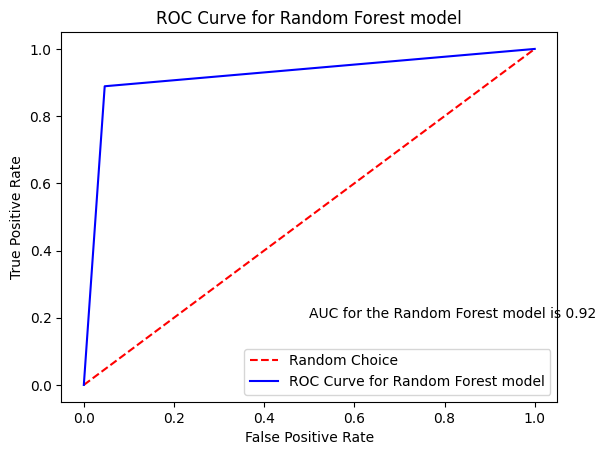

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       108
           1       0.91      0.78      0.84        63

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171



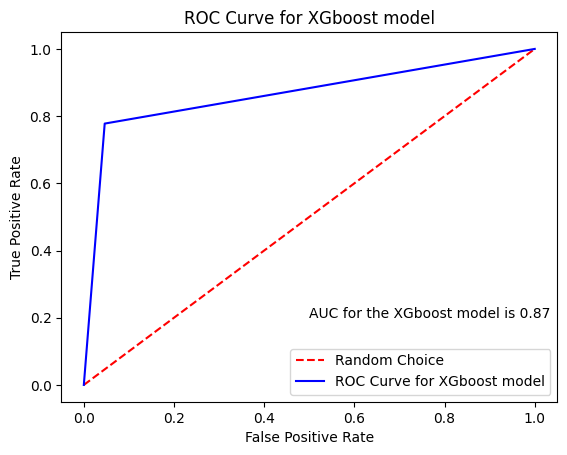

In [122]:
model_build(data_smoothed)

Training data shape: (499, 10)
Testing data shape: (215, 10)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.95      0.95      0.95       102

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215



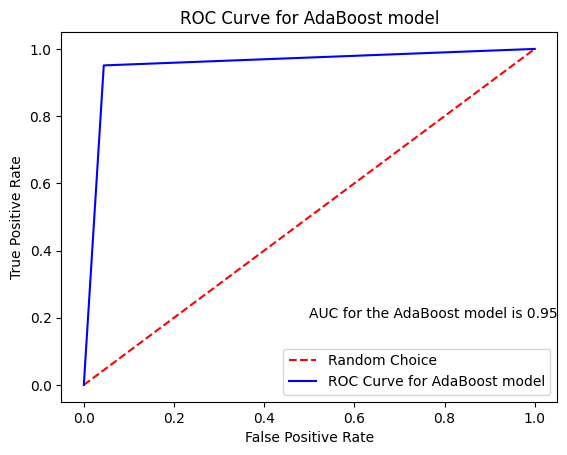

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       113
           1       0.90      0.92      0.91       102

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215



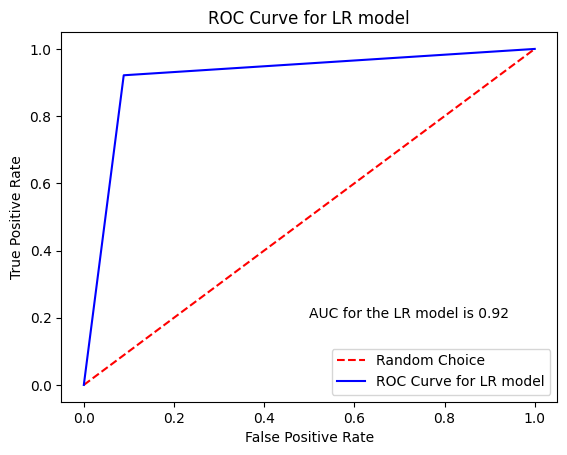

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       113
           1       0.94      0.91      0.93       102

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



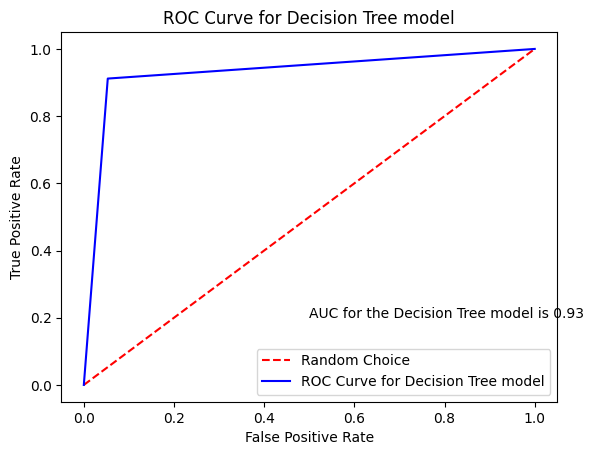

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       113
           1       0.91      0.94      0.92       102

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



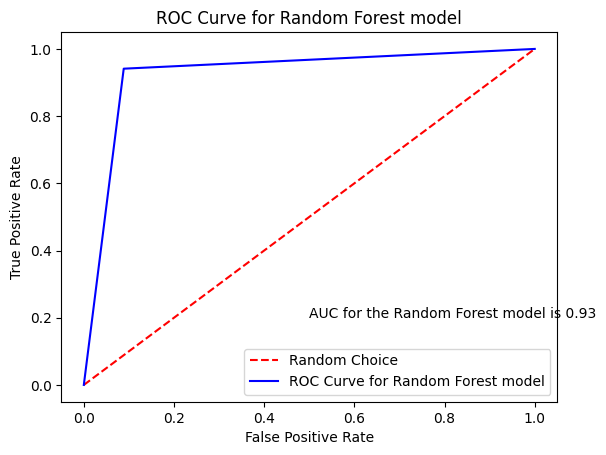

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       113
           1       0.90      0.94      0.92       102

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215



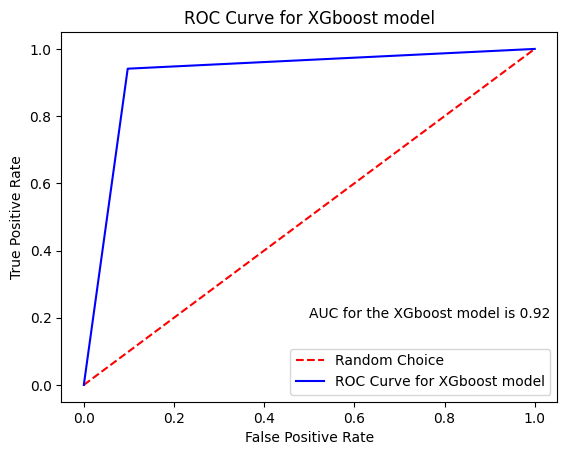

In [123]:
model_build(data_smt)

Training data shape: (499, 10)
Testing data shape: (215, 10)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       113
           1       0.89      0.92      0.90       102

    accuracy                           0.91       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215



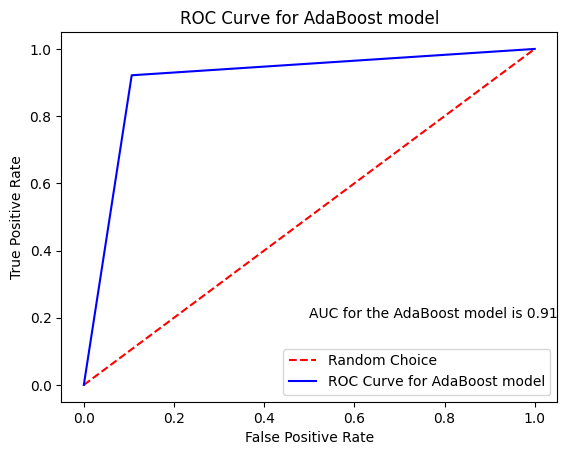

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       113
           1       0.90      0.90      0.90       102

    accuracy                           0.91       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215



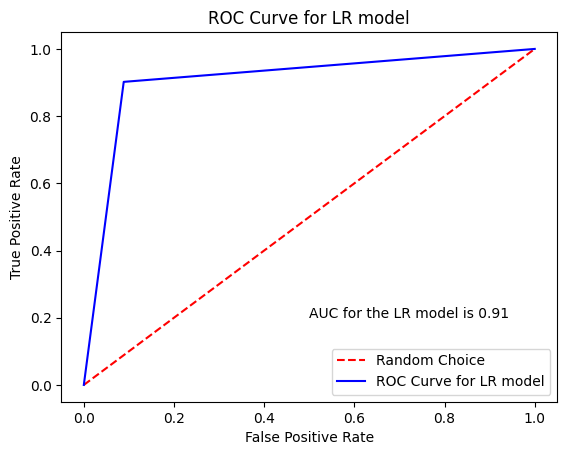

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       113
           1       0.88      0.91      0.89       102

    accuracy                           0.90       215
   macro avg       0.90      0.90      0.90       215
weighted avg       0.90      0.90      0.90       215



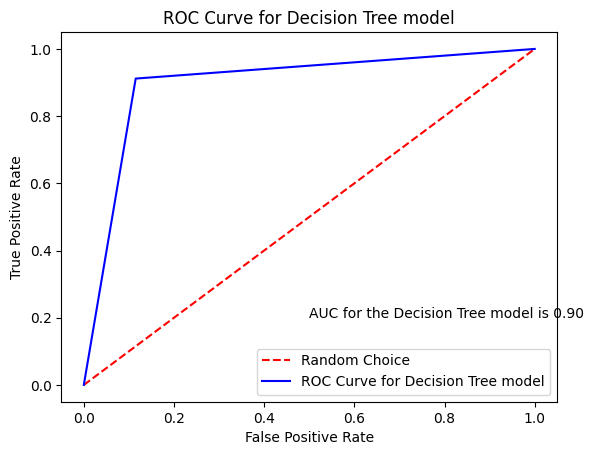

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       113
           1       0.92      0.93      0.93       102

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



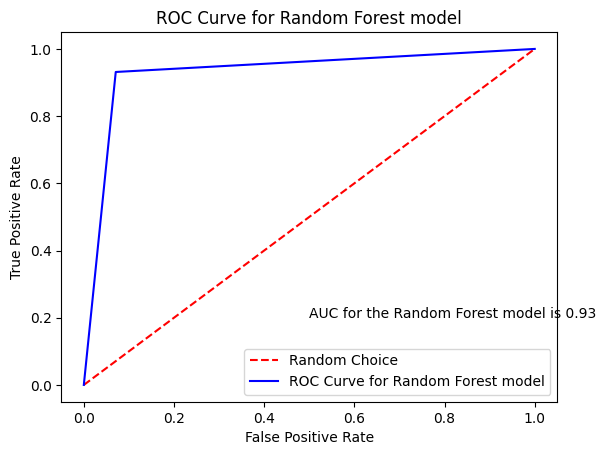

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       113
           1       0.91      0.94      0.93       102

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



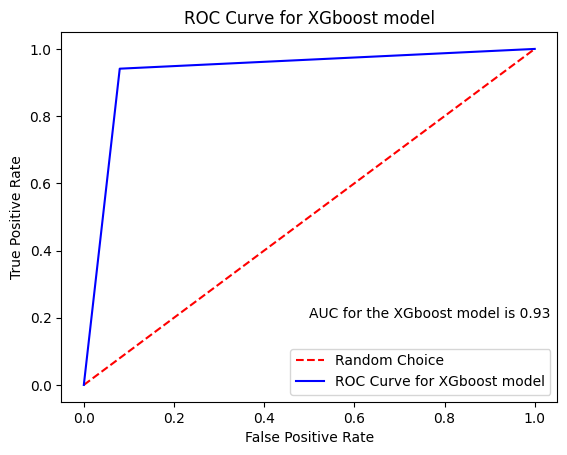

In [124]:
model_build(data_smt_smooth)

In [125]:
# Split the data into features (X) and target (y)
X = data_smt.drop('Diagnosis', axis=1)  # All columns except Diagnosis
y = data_smt['Diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for AdaBoost (expanded)
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],       # Added more values for boosting rounds
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0,1.1,1.2,1.3,1.4, 1.5,1.6,1.7,1.8,1.9,2]  # Added more values for learning rate
}

# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)  # Set random_state here for reproducibility

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(ada, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 1.1, 'n_estimators': 500}


In [126]:
def adamodel(data_inp,learning,n_est,rand):
    # Define features and target variable
    X = data_inp.drop('Diagnosis', axis=1)  # All columns except Diagnosis
    y = data_inp['Diagnosis']
    # Split the data into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print(f'Training data shape: {X_train.shape}')
    print(f'Testing data shape: {X_test.shape}')
    model=AdaBoostClassifier(learning_rate=learning,n_estimators=n_est,random_state=rand)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'The classification by Adaboost model is as follows')
    print(classification_report(y_test,y_pred))
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot([0,1],[0,1],'k--',label='Random Choice', color='Red')
    plt.plot(fpr,tpr, label=f'ROC Curve for Adaboost model', color='blue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(.5,.2,f'AUC for the Adaboost model is {auc:.2f}')
    plt.title(f'ROC Curve for Adaboost model')
    plt.legend()
    plt.show()
        

Training data shape: (499, 10)
Testing data shape: (215, 10)
The classification by Adaboost model is as follows
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       113
           1       0.93      0.95      0.94       102

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



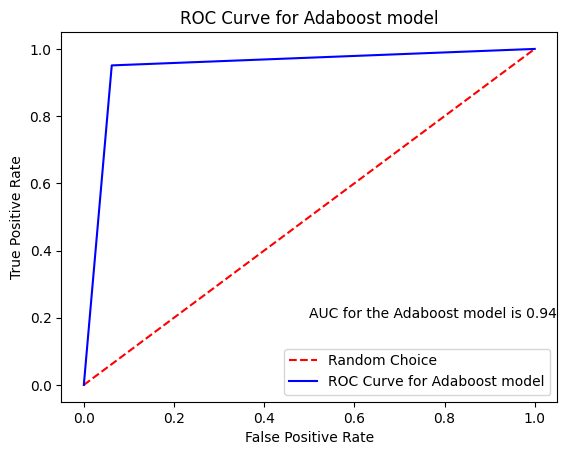

In [127]:
adamodel(data_smt,1.1,500,42)

In [128]:
from joblib import dump

# Example AdaBoost model
X = data_smt.drop('Diagnosis', axis=1)  # All columns except Diagnosis
y = data_smt['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = AdaBoostClassifier(learning_rate=1.1,n_estimators=500,random_state=42)
model.fit(X_train, y_train)  # Train your model
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
# Save the model
dump(model, 'adaboost_model.joblib')
print("Model saved as 'adaboost_model.joblib'")

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       113
           1       0.93      0.95      0.94       102

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215

Model saved as 'adaboost_model.joblib'


In [129]:
data_vif=data_raw.copy()

In [130]:
data_vif.columns

Index(['Diagnosis', 'perimeter1', 'smoothness1', 'symmetry1',
       'fractal_dimension1', 'texture2', 'perimeter2', 'smoothness2',
       'symmetry2', 'compactness3', 'symmetry3'],
      dtype='object')

In [132]:
# data_vif_pass=data_vif.drop(['area1','radius1','area2','radius2','radius3','area3','concavity1','concavity2','concavity3','compactness1','compactness2','perimeter3','concave_points1','concave_points2','concave_points3','fractal_dimension3','fractal_dimension2','texture1','texture3','smoothness3'], axis=1).copy()

In [134]:
print(data_vif.columns)


Index(['Diagnosis', 'perimeter1', 'smoothness1', 'symmetry1',
       'fractal_dimension1', 'texture2', 'perimeter2', 'smoothness2',
       'symmetry2', 'compactness3', 'symmetry3'],
      dtype='object')


In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example DataFrame (replace with your actual dataset)

# Add constant to the data (intercept term)
X = add_constant(data_vif_pass)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
print(vif_data)

               Feature         VIF
0                const  337.743550
1            Diagnosis    3.240835
2           perimeter1    5.290145
3          smoothness1    2.349636
4            symmetry1    2.995382
5   fractal_dimension1    3.821458
6             texture2    1.537587
7           perimeter2    3.104662
8          smoothness2    1.901272
9            symmetry2    2.597828
10        compactness3    3.927063
11           symmetry3    4.749527


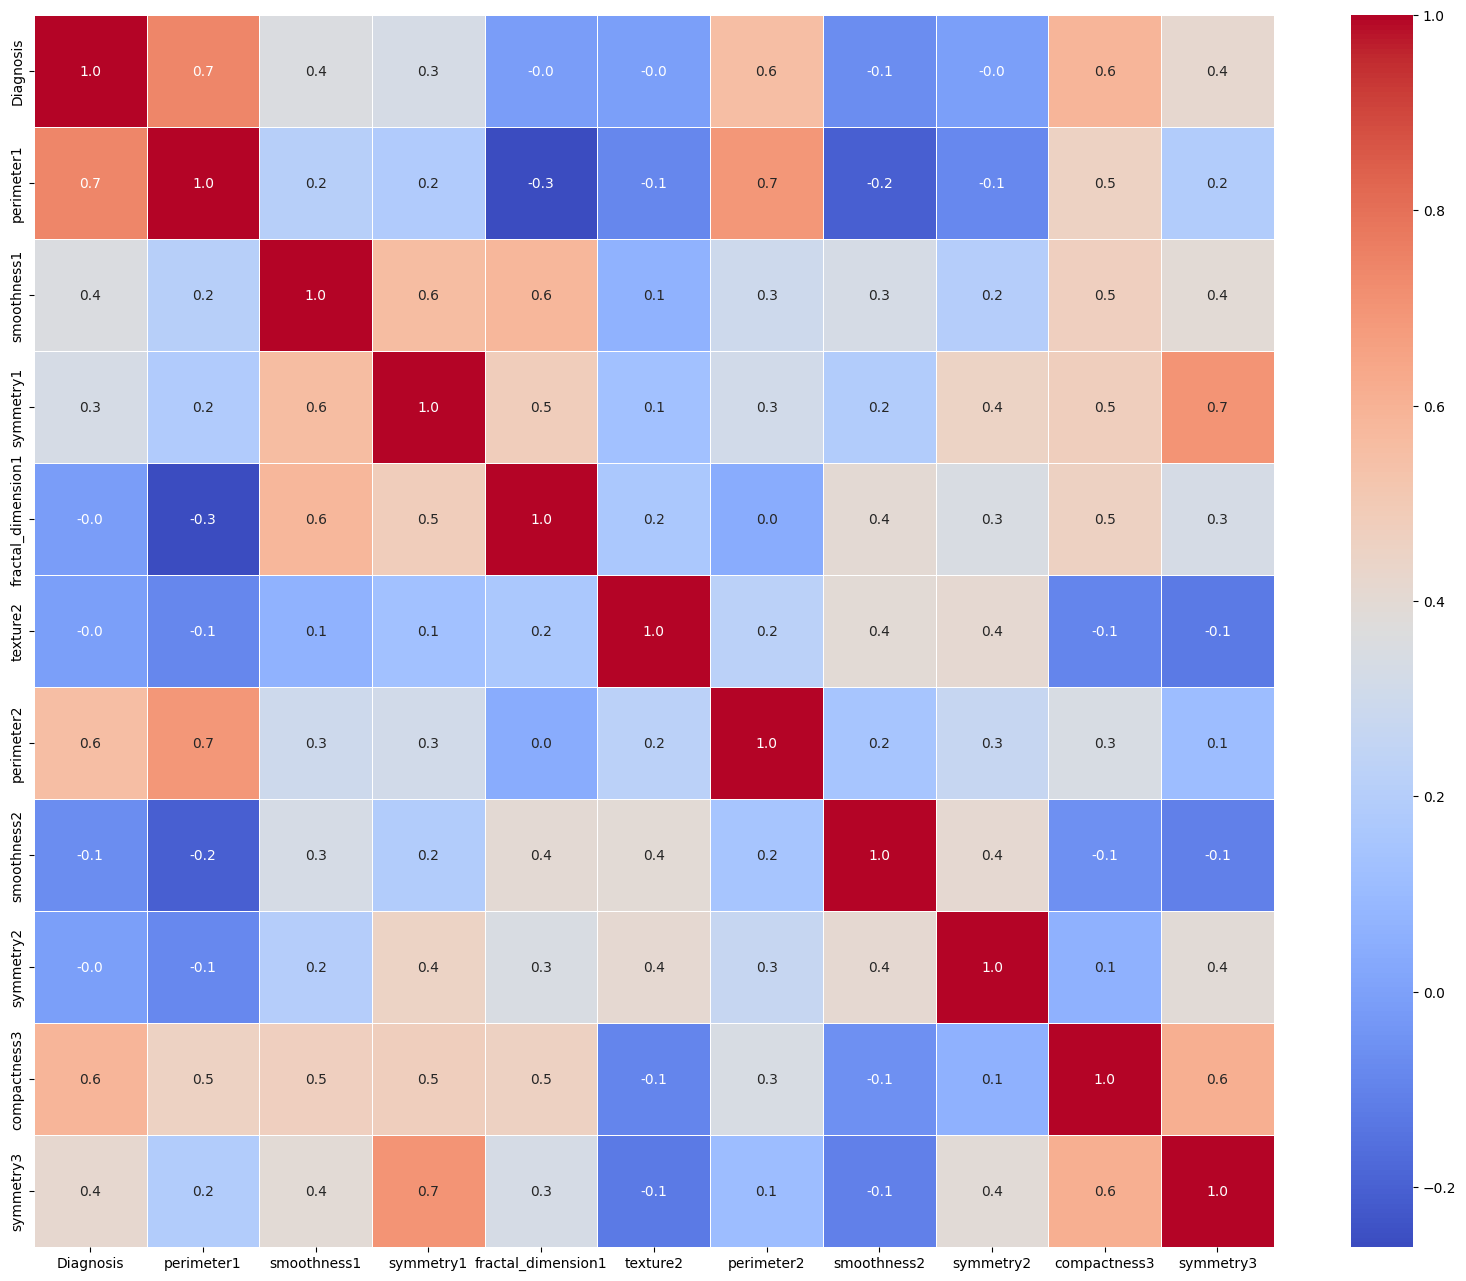

In [138]:
# Assuming 'data_vif_pass' is your DataFrame
plt.figure(figsize=(20, 16))

# Generate the heatmap for correlation matrix with annotations
sns.heatmap(data_vif_pass.corr(), annot=True, cmap='coolwarm', fmt='.01f', linewidths=0.5)

# Show the plot
plt.show()

Training data shape: (499, 10)
Testing data shape: (215, 10)
The classification by Adaboost model is as follows
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       113
           1       0.95      0.93      0.94       102

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



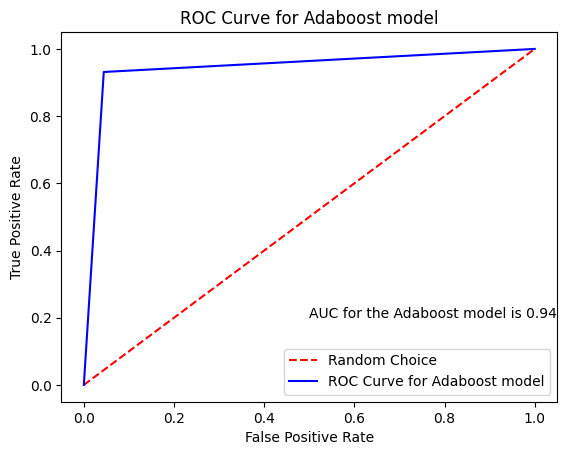

In [140]:
adamodel(data_smt,1.0,300,42)